# **Use of Dataset and DataLoader for pytorch**

Usually the datasets are too big to train a model with the full amount of data, thus it is better to train the model in batches. Here, Dataset and DataLoader help us providing the batches for training. 

## **Dataset** 

The dataset class allows to quickly access the data we want. For instance, if we have the following data: [[1,2,3], [2,5,7], [2,3,4]] with its labels [[1],[2],[3]], and we use the Dataset class, we would be able to access the data by passing and index. Thus, given the index 1 we will access [2,5,7] and the label [2].

Lets see ho to create this class

In [1]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset): # Geenrating the class Dataset
  def __init__(self, features, labels): # This dataset has as input the features and the labels
    self.data = features
    self.labels = labels
  def __getitem__(self, index): # This part will return the data depending on the index
    return self.data[index], self.labels[index]
  def __len__(self): # This part will return the amount of samples
    return len(self.data)



##### Testing the class #######


features = torch.tensor([[1,2,3], [2,5,7], [2,3,4]])
labels = torch.tensor([[1],[2],[3]])

dataset = MyDataset(features, labels)
print(dataset[1])
print(len(dataset))



(tensor([2, 5, 7]), tensor([2]))
3


## **Dataloader** 

Now, with the easy accsses that Dataset gives to the data, Dataloader helps us to quickly get batches to trains the model.

This batches are small quantity of data, for example, a batch of 100 samples would be 10 samples.

Let's see how it works:
First we will create more data and load it to a dataset

In [2]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset): # Geenrating the class Dataset
  def __init__(self, features, labels): # This dataset has as input the features and the labels
    self.data = features
    self.labels = labels
  def __getitem__(self, index): # This part will return the data depending on the index
    return self.data[index], self.labels[index]
  def __len__(self): # This part will return the amount of samples
    return len(self.data)



##### Testing the class #######


features = torch.randn(100,3)
labels = torch.randint(1,10,(100,1))


dataset = MyDataset(features, labels)
print(dataset[5])
print(len(dataset))

(tensor([ 1.0051, -0.6841,  0.3483]), tensor([6]))
100


In [5]:
from torch.utils.data import DataLoader

dataload = DataLoader(dataset, batch_size=10, shuffle=True) # generates de dataloader

for i, (x, y) in enumerate(dataload): # print the batch #2
  if i == 2:
    print(x,y)

tensor([[-0.1817,  0.0082,  1.1164],
        [-0.3672,  1.4349,  0.0261],
        [ 0.0618,  0.1141,  0.6496],
        [-1.3188,  0.4026,  0.5779],
        [ 0.6742, -1.6176,  1.0395],
        [-0.2378, -1.7602,  0.3667],
        [ 0.7369,  0.8445, -0.5811],
        [ 0.0677, -0.1857,  0.4301],
        [ 0.4743,  0.1164, -0.0805],
        [ 0.1215,  1.1100, -1.0341]]) tensor([[9],
        [3],
        [5],
        [2],
        [9],
        [3],
        [4],
        [6],
        [4],
        [7]])


## **Using in a ML model**

Lets use our recently learned Dataloader to train a network. Let's work with one of our first attemps, the linear regression.



(500,)


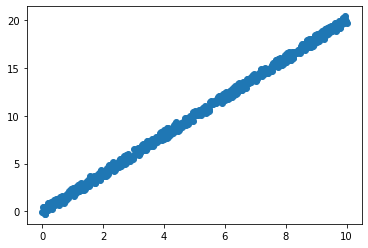

In [32]:
# Generating linear data

# First we will generate and plot linear data
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,500)
print(x.shape)
y = x * 0
for i in range(len(x)):
  rand = np.random.rand()
  rand = rand - .5
  y[i] = 2*x[i] + rand


plt.scatter(x,y)

In [33]:
# Data manipulation
#### for x ####
print(x.shape)
x = np.array([x])
x = x.T

features = torch.tensor(x, dtype = float)

#### for y ####

y = np.array([y])
y = y.T
labels = torch.tensor(y, dtype = float)
print(features.shape, labels.shape)

(500,)
torch.Size([500, 1]) torch.Size([500, 1])


Its time to feed our data to the dataloader

Parameter containing:
tensor([[2.0078]], dtype=torch.float64, requires_grad=True) Parameter containing:
tensor([-0.0210], dtype=torch.float64, requires_grad=True)


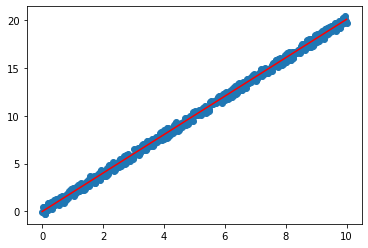

In [37]:
class Linearset(Dataset):
  def __init__(self, features, labels):
    self.data = features
    self.labels = labels
  def __getitem__(self, index):
    return self.data[index], self.labels[index]
  def __len__(self):
    return len(self.data)


dataloader = DataLoader(Linearset(features, labels), batch_size=50, shuffle=True )


#### Create the model ####
input_dim = 1
output_dim = 1
learning_rate = 0.01
model = torch.nn.Linear(input_dim, output_dim, dtype = float)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

### Running the model ###

n_epochs = 1000

for epoch in range(n_epochs):
  for i, (feat, label) in enumerate(dataloader):
    y_predicted = model(feat)
    J = loss(y_predicted, label)
    J.backward()
    optimizer.step()
    optimizer.zero_grad()
w, b = model.parameters()

print(w,b)


#### Print the model ###
x_model = np.linspace(0,10,100)
y_model = w.item() * x_model
plt.scatter(x,y)
plt.plot(x_model,y_model, color = 'red')

# Object oriented models

The models one need to create will usually be very long. In those cases, to train we will have to write each layer in the training loop which can be confusing at high layer numbers.

 Lets repeat the same model as before with obtect oriented programmig.

Parameter containing:
tensor([[2.0074]], dtype=torch.float64, requires_grad=True) Parameter containing:
tensor([-0.0210], dtype=torch.float64, requires_grad=True)


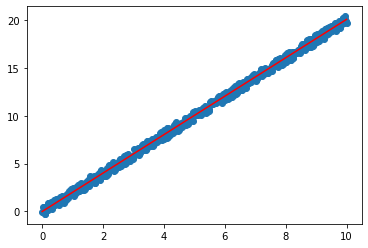

In [40]:
class Network(torch.nn.Module):
  def __init__(self, input_dim, output_dim): # In this part we should build all the layers
    super(Network,self).__init__()
    self.model = torch.nn.Linear(input_dim, output_dim, dtype=float)
  def forward(self, data): # in this part the layers should be called
    out = self.model(data)
    return out

### Note that in this case the object oriented code takes more time, but for big networks helps a lot


### Running the model

input_dim = 1
output_dim = 1
learning_rate = 0.01

model = Network(input_dim, output_dim)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)



### Training the model ###

n_epochs = 1000

for epoch in range(n_epochs):
  for i, (feat, label) in enumerate(dataloader):
    y_predicted = model(feat)
    J = loss(y_predicted, label)
    J.backward()
    optimizer.step()
    optimizer.zero_grad()
w, b = model.parameters()

print(w,b)


#### Print the model ###
x_model = np.linspace(0,10,100)
y_model = w.item() * x_model
plt.scatter(x,y)
plt.plot(x_model,y_model, color = 'red')